**Задача 1**
1. Загрузить средствами PyTorch тренировочные и тестовые наборы данных MNIST (в параметр transform передать следующее: transform.Compose([transform,ToTensor()])

2. Для каждого набора создать объект DataLoader (параметры batch_size и shuffle выбирать произвольно)

3. Узнать о наборах данных следующую информацию: величина, распределение по классам

4. Отобразить из тренировочного и тестового набора MNIST по одному экземпляру с помощью библиотеки Matplotlib

5. Отобразить из объектов DataLoader с тренировочным и тестовым наборами данных по одному батчу с помощью библиотеки Matplotlib

In [ ]:
import torchvision.datasets as datasets
import torchvision.transforms as transforms

# загрузка тренировочной выборки датасета Fashion-MNIST
train_data = datasets.MNIST(r"\content\MNIST",
                          train=True,
                          download=True,
                          transform = transforms.Compose([transforms.ToTensor()]))

Extracting \content\MNIST/MNIST/raw/train-images-idx3-ubyte.gz to \content\MNIST/MNIST/raw


Extracting \content\MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to \content\MNIST/MNIST/raw




Extracting \content\MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to \content\MNIST/MNIST/raw


Extracting \content\MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to \content\MNIST/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
# пример создания DataLoader для датасета Fashion-MNIST
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_data, batch_size=16, shuffle=True)
print(type(train_dataloader))

torch.utils.data.dataloader.DataLoader


In [ ]:
# узнать величину датасета
print(len(train_data))
print(len(train_dataloader))

60000
3750


In [ ]:
# вывести, сколько представителей каждого класса есть в наборе данных:
print(train_data.targets.bincount())

tensor([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949])


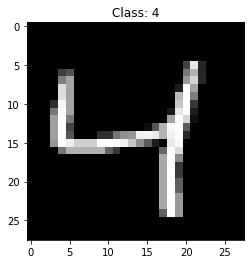

In [ ]:
# отображение элемента набора данных с помощью matplotlib

import matplotlib.pyplot as plt
%matplotlib inline

# словарь классов
classes = {
    0: "0",
    1: "1",
    2: "2",
    3: "3",
    4: "4",
    5: "5",
    6: "6",
    7: "7",
    8: "8",
    9: "9"
}

iter_data = iter(train_data)
image, label = next(iter_data)
image, label = next(iter_data)
image, label = next(iter_data)
# для "отбрасывания" размерности батча вызываем функцию squeeze()
image_squezze = image.squeeze()

# перевод изображения в NumPy-массив для отображения на графике
image_numpy = image_squezze.numpy()

# вывод изображения
plt.imshow(image_numpy, cmap="gray")
plt.title(f"Class: {classes[label]}")
plt.show()

torch.Size([3, 122, 122])


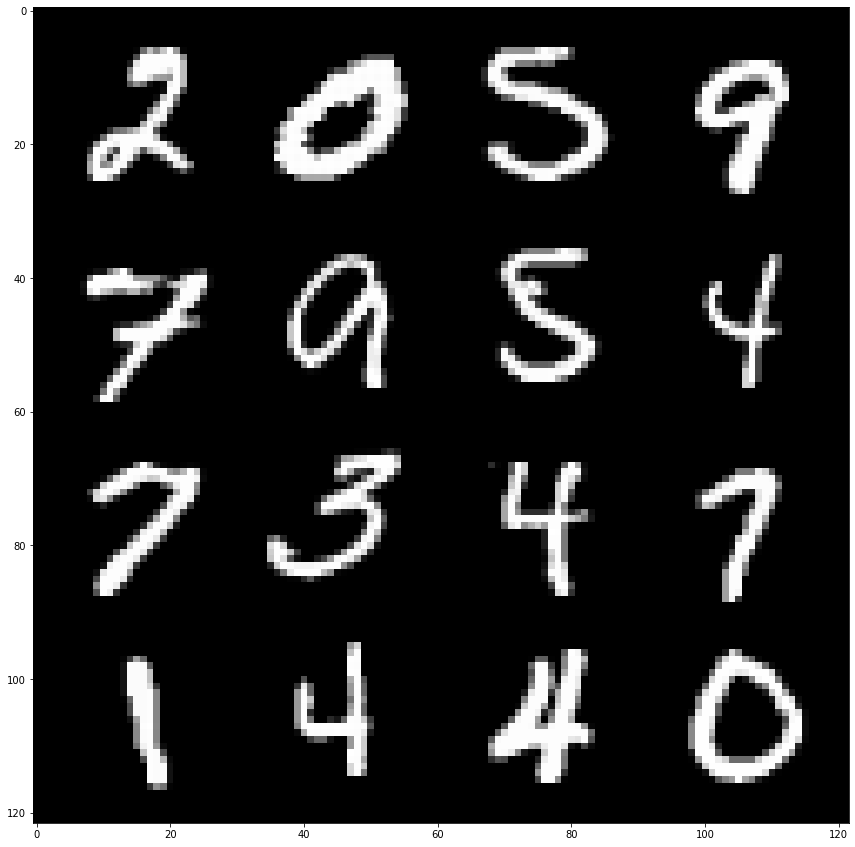

In [ ]:
import numpy as np

# отображение небольшого пакета данных с помощью matplotlib

# извлечение батча из DataLoader
images, labels = next(iter(train_dataloader))

# для отображения пакета изображений применим функцию make_grid() из torchvision.utils
from torchvision.utils import make_grid

grid = make_grid(images, nrow=4)
print(grid.shape)
plt.figure(figsize=(15, 15))
plt.imshow(np.transpose(grid, (1,2,0)))

**Задача 2**

1. Создать свой набор данных на примере датасета Dogs vs Cats

2. Загрузить тренировочный и тестовый выборки датасета с помощью класса ImageFolder (в параметр transform передать следующее: transform.Compose([transform,ToTensor()]

3. Для каждой выборки создать объект DataLoader (параметры batch_size и shuffle выбирать произвольно)

4. Отобразить из тренировочного и тестовой выборки по одному экземпляру с помощью библиотеки Matplotlib

5. Отобразить из объектов DataLoader с тренировочным и тестовым наборами данных по одному батчу с помощью библиотеки Matplotlib

6. Создать объект transform, который будет осуществлять следующие преобразования: ресайз картинки до размера 256 на 256 пикселей, случайный поворот влево/вправо до 70 градусов, случайный поворот по горизонтали, перевод в градации серого и перевод в тензор

7. Создать новый объект ImageFolder (в параметр root передать либо путь к тренировочной, либо путь к тестовой выборке, одно из двух), передав созданный объект transform в пункте выше

8. Отобразить пример преобразованного изображения из объекта ImageFolder с помощью библиотеки Matplotlib

In [ ]:
!unrar x /content/car.rar


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/car.rar

Extracting  car/test/00001.jpg                                             0%  OK 
Extracting  car/test/00002.jpg                                             0%  OK 
Extracting  car/test/00003.jpg                                             0%  OK 
Extracting  car/test/00004.jpg                                             0%  OK 
Extracting  car/test/00005.jpg                                             0%  OK 
Extracting  car/test/00006.jpg                                             0%  OK 
Extracting  car/test/00007.jpg                                             0%  OK 
Extracting  car/test/00008.jpg                                             0%  OK 
Extracting  car/test/00009.jpg                                             0%  OK 
Extracting  car/test/00010.jpg                                       

In [ ]:
!mkdir car/train/car
!mkdir car/test/car

In [ ]:
!mv car/train/*.jpg car/train/car
!mv car/test/*.jpg car/test/car

In [ ]:
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

2. Загрузить тренировочный и тестовый выборки датасета с помощью класса ImageFolder (в параметр transform передать следующее: transform.Compose([transform,ToTensor()]

In [ ]:
train_path = r"/content/car/train"
test_path  = r"/content/car/test"

train_data = datasets.ImageFolder(train_path, transforms.Compose([transforms.ToTensor()]))
test_data = datasets.ImageFolder(test_path, transforms.Compose([transforms.ToTensor()]))

print(type(train_data))
print(type(test_data))

print(train_data.classes)
print(test_data.classes)

torchvision.datasets.folder.ImageFolder
torchvision.datasets.folder.ImageFolder
['car']
['car']


3. Для каждой выборки создать объект DataLoader (параметры batch_size и shuffle выбирать произвольно)

In [ ]:
# создаем объекты DataLoader

train_loader = DataLoader(train_data, batch_size=16, shuffle=True)
test_loader  = DataLoader(test_data, batch_size=16, shuffle=True)

print(type(train_loader))
print(type(test_loader))

torch.utils.data.dataloader.DataLoader
torch.utils.data.dataloader.DataLoader


4. Отобразить из тренировочного и тестовой выборки по одному экземпляру с помощью библиотеки Matplotlib

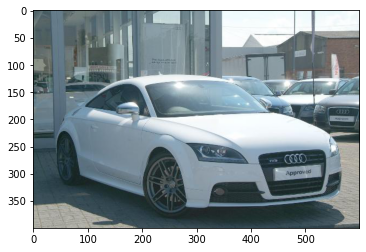

torch.Size([3, 400, 600])
0


In [ ]:
image, label = next(iter(train_data))

plt.imshow(image.squeeze().numpy().transpose(1, 2, 0))
plt.show()
print(image.shape)
print(label)

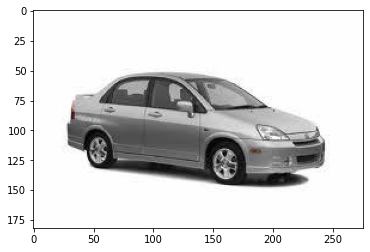

torch.Size([3, 182, 276])
0


In [ ]:
image, label = next(iter(test_data))

plt.imshow(image.squeeze().numpy().transpose(1, 2, 0))
plt.show()
print(image.shape)
print(label)

6. Создать объект transform, который будет осуществлять следующие преобразования: ресайз картинки до размера 256 на 256 пикселей, случайный поворот влево/вправо до 70 градусов, случайный поворот по горизонтали, перевод в градации серого и перевод в тензор

In [ ]:

transform = transforms.Compose(
    [
     transforms.Grayscale(),
     transforms.Resize((480, 640)),
     #transforms.RandomRotation(70),
     #transforms.RandomHorizontalFlip(),
     transforms.ToTensor()
    ]
)

7. Создать новый объект ImageFolder (в параметр root передать либо путь к тренировочной, либо путь к тестовой выборке, одно из двух), передав созданный объект transform в пункте выше

In [ ]:
# создадим новый объект ImageFolder
train_new = datasets.ImageFolder(train_path, transform=transform)

# создадим новый объект DataLoader
train_loader = DataLoader(train_new, batch_size=16, shuffle=True)

# создадим новый объект ImageFolder
test_new = datasets.ImageFolder(test_path, transform=transform)

# создадим новый объект DataLoader
test_loader = DataLoader(test_new, batch_size=16, shuffle=True)

8. Отобразить пример преобразованного изображения из объекта ImageFolder с помощью библиотеки Matplotlib


torch.Size([1, 480, 640])


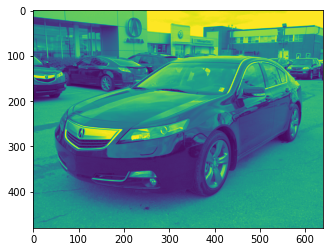

In [ ]:
# извлечем пример преобразованного изображения и отобразим его
iter_obj = iter(train_new)
image, label = next(iter_obj)
image, label = next(iter_obj)
print(image.shape)
plt.imshow(image.squeeze().numpy())

5. Отобразить из объектов DataLoader с тренировочным и тестовым наборами данных по одному батчу с помощью библиотеки Matplotlib

torch.Size([3, 966, 6422])


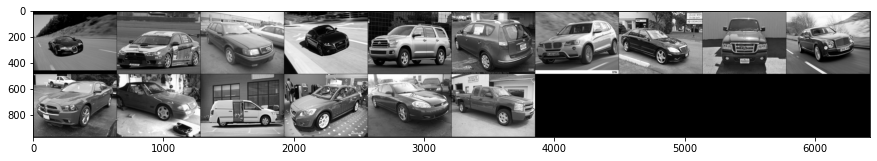

In [ ]:
# отображение небольшого пакета данных с помощью matplotlib

# извлечение батча из DataLoader
images, labels = next(iter(train_loader))

# для отображения пакета изображений применим функцию make_grid() из torchvision.utils
#from torchvision.utils import make_grid
from torchvision.utils import make_grid

grid = make_grid(images, nrow=10)
print(grid.shape)
plt.figure(figsize=(15, 15))
plt.imshow(np.transpose(grid, (1,2,0)))

In [ ]:

# отображение небольшого пакета данных с помощью matplotlib

# извлечение батча из DataLoader
images, labels = next(iter(test_loader))

# для отображения пакета изображений применим функцию make_grid() из torchvision.utils

grid = make_grid(images, nrow=10)
print(grid.shape)
plt.figure(figsize=(15, 15))
plt.imshow(np.transpose(grid, (1,2,0)))

torch.Size([3, 966, 6422])
